Created by: Adam Baihaqi Satriobudi (23M18690)

In [38]:
import numpy as np
import numpy.random as rnd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from tensorflow import keras
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [53]:
# Loading the dataset using cifar10 small images, This is a dataset of 50,000 32x32 color training images."
cifar10 = keras.datasets.cifar10

I got a little curios on how PCA would handle RGB dataset, so I try to modify the code a little. The concept implementation of the PCA method is still the same though.

In [43]:
# Splitting the dataset into training and test data",
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [44]:
# Flatten the images
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

In [45]:
# Normalize the data to be between 0 and 1
X_train_flat = X_train_flat.astype('float32') / 255.0
X_test_flat = X_test_flat.astype('float32') / 255.0

In [46]:
# Set the variance threshold for PCA
variance_threshold = 0.95
pca = PCA(variance_threshold)
X_train_pca = pca.fit_transform(X_train_flat)

# Print the number of components
print(f"Number of PCA components: {pca.n_components_}")

Number of PCA components: 217


In [47]:
CumExplainedVar = np.cumsum(pca.explained_variance_ratio_)

In [48]:
d = np.argmax(CumExplainedVar >= 0.95) + 1

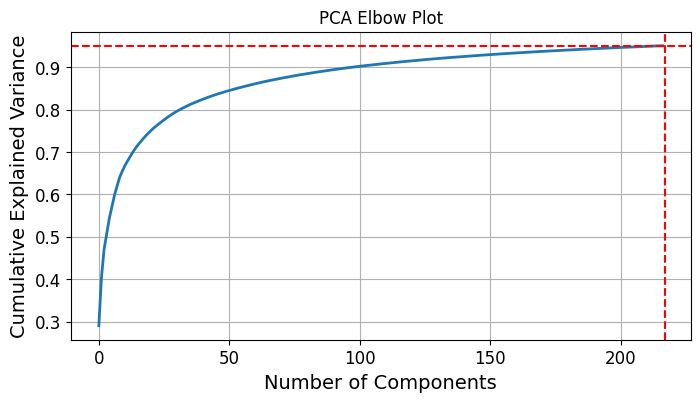

In [49]:
plt.figure(figsize=(8, 4))
plt.plot(CumExplainedVar, linewidth=2)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.axhline(y=0.95, color='r', linestyle='--')
plt.axvline(x=d, color='r', linestyle='--')
plt.title('PCA Elbow Plot')
plt.grid(True)
plt.show()

In [50]:
# Refit PCA with the optimal number of components
pca = PCA(n_components=d)
X_train_pca = pca.fit_transform(X_train_flat)
X_train_reconstructed = pca.inverse_transform(X_train_pca)


In [51]:
def plot_digits(instances, images_per_row=10, **options):
    size = 32  # Each image is 32x32 pixels
    images_per_row = min(len(instances), images_per_row)
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images = [instance.reshape(size, size, 3) for instance in instances]
    images.append(np.zeros((size, size, 3 * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, **options)
    plt.axis("off")


The results is not bad, I'm actually impressed, I thought it would be more blur

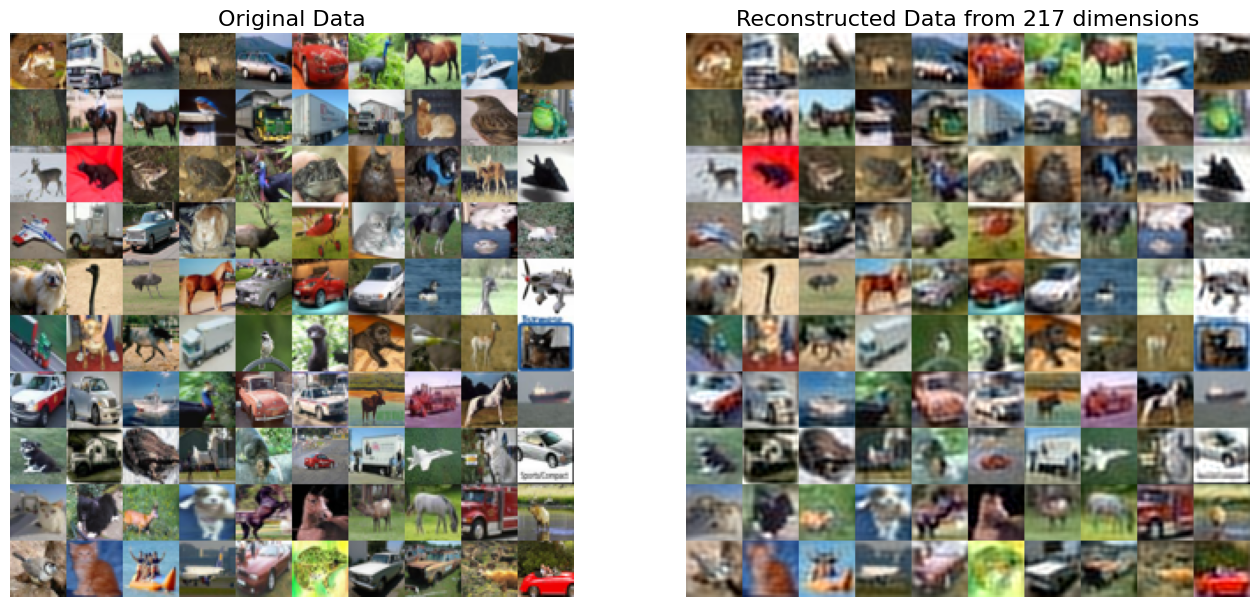

In [52]:
plt.figure(figsize=(16, 8))

# Plot original images
plt.subplot(121)
plot_digits(X_train[:100].reshape(100, -1))  # Reshape for plotting
plt.title("Original Data", fontsize=16)

# Plot reconstructed images
plt.subplot(122)
plot_digits(X_train_reconstructed[:100])  # First 100 reconstructed images
plt.title(f"Reconstructed Data from {d} dimensions", fontsize=16)

plt.show()
